In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

%matplotlib inline

In [48]:
df = pd.read_csv('AIQ.csv',encoding='latin-1')

In [49]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
sns.set(style="ticks", rc = {'figure.figsize':(20,15)})
 # Supressing update warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
 print(df.isnull().sum())
 print(df.shape)
 df.info()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64
(435742, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency    

In [52]:
df = df.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1)

# Drop rows where 'date' column has NaN values
df = df.dropna(subset=['date'])

# Clean up name changes
df['state'] = df['state'].replace({'Uttaranchal': 'Uttarakhand'})

# Update 'state' for specific location using loc
df.loc[df['location'] == "Jamshedpur", 'state'] = df['state'][df['location'] == "Jamshedpur"]

# Standardize 'type' column
types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}
df['type'] = df['type'].replace(types)

In [53]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [54]:
 # defining columns of importance, which shall be used reguarly
 VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [55]:
 # invoking SimpleImputer to fill missing values
 imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
 df[VALUE_COLS] = imputer.fit_transform(df[VALUE_COLS])

In [56]:
# checking to see if the dataset has any null values left over and the forma
print(df.isnull().sum())
df.tail()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
dtype: int64


,state,location,type,so2,no2,rspm,spm,pm2_5,date
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,220.78348,40.791467,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,220.78348,40.791467,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,220.78348,40.791467,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,220.78348,40.791467,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,220.78348,40.791467,2015-12-29


In [57]:
# defining a function that plots SO2, NO2, RSPM and SPM yearly average level
 # since data is available monthly, it was resampled to a year and averaged t
 # years for which no data was collected has not been imputed
# defining a function that plots SO2, NO2, RSPM and SPM yearly average level
 # since data is available monthly, it was resampled to a year and averaged t
 # years for which no data was collected has not been imputed
def plot_for_state(state):
 fig, ax = plt.subplots(2,2, figsize=(20,12))
 fig.suptitle(state, size=20)
 state = df[df.state == state]
 state = state.reset_index().set_index('date')[VALUE_COLS].resample('Y').mean()
 state.so2.plot(legend=True, ax=ax[0][0], title="so2")
 ax[0][0].set_ylabel("so2 (µg/m3)")
 ax[0][0].set_xlabel("Year")
 state.no2.plot(legend=True, ax=ax[0][1], title="no2")
 ax[0][1].set_ylabel("no2 (µg/m3)")
 ax[0][1].set_xlabel("Year")
 state.rspm.plot(legend=True, ax=ax[1][0], title="rspm")
 ax[1][0].set_ylabel("RSPM (PM10 µg/m3)")
 ax[1][0].set_xlabel("Year")
 state.spm.plot(legend=True, ax=ax[1][1], title="spm")
 ax[1][1].set_ylabel("SPM (PM10 µg/m3)")
 ax[1][1].set_xlabel("Year")


In [59]:
# defining a function to find and plot the top 10 and bottom 10 states for a
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2, 1, figsize=(20, 12))
    
    # Group by 'state' and calculate the median for the specified indicator
    ind = df[[indicator, 'state']].groupby('state', as_index=False).median()
    ind = ind.sort_values(by=indicator, ascending=False)  # Sort by indicator in descending order
    
    # Top 10 states
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0])
    top10.set_title(f"Top 10 states by {indicator} (1991-2016)")
    top10.set_ylabel(f"{indicator} (µg/m3)")
    top10.set_xlabel("State")
    
    # Bottom 10 states
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1])
    bottom10.set_title(f"Bottom 10 states by {indicator} (1991-2016)")
    bottom10.set_ylabel(f"{indicator} (µg/m3)")
    bottom10.set_xlabel("State")

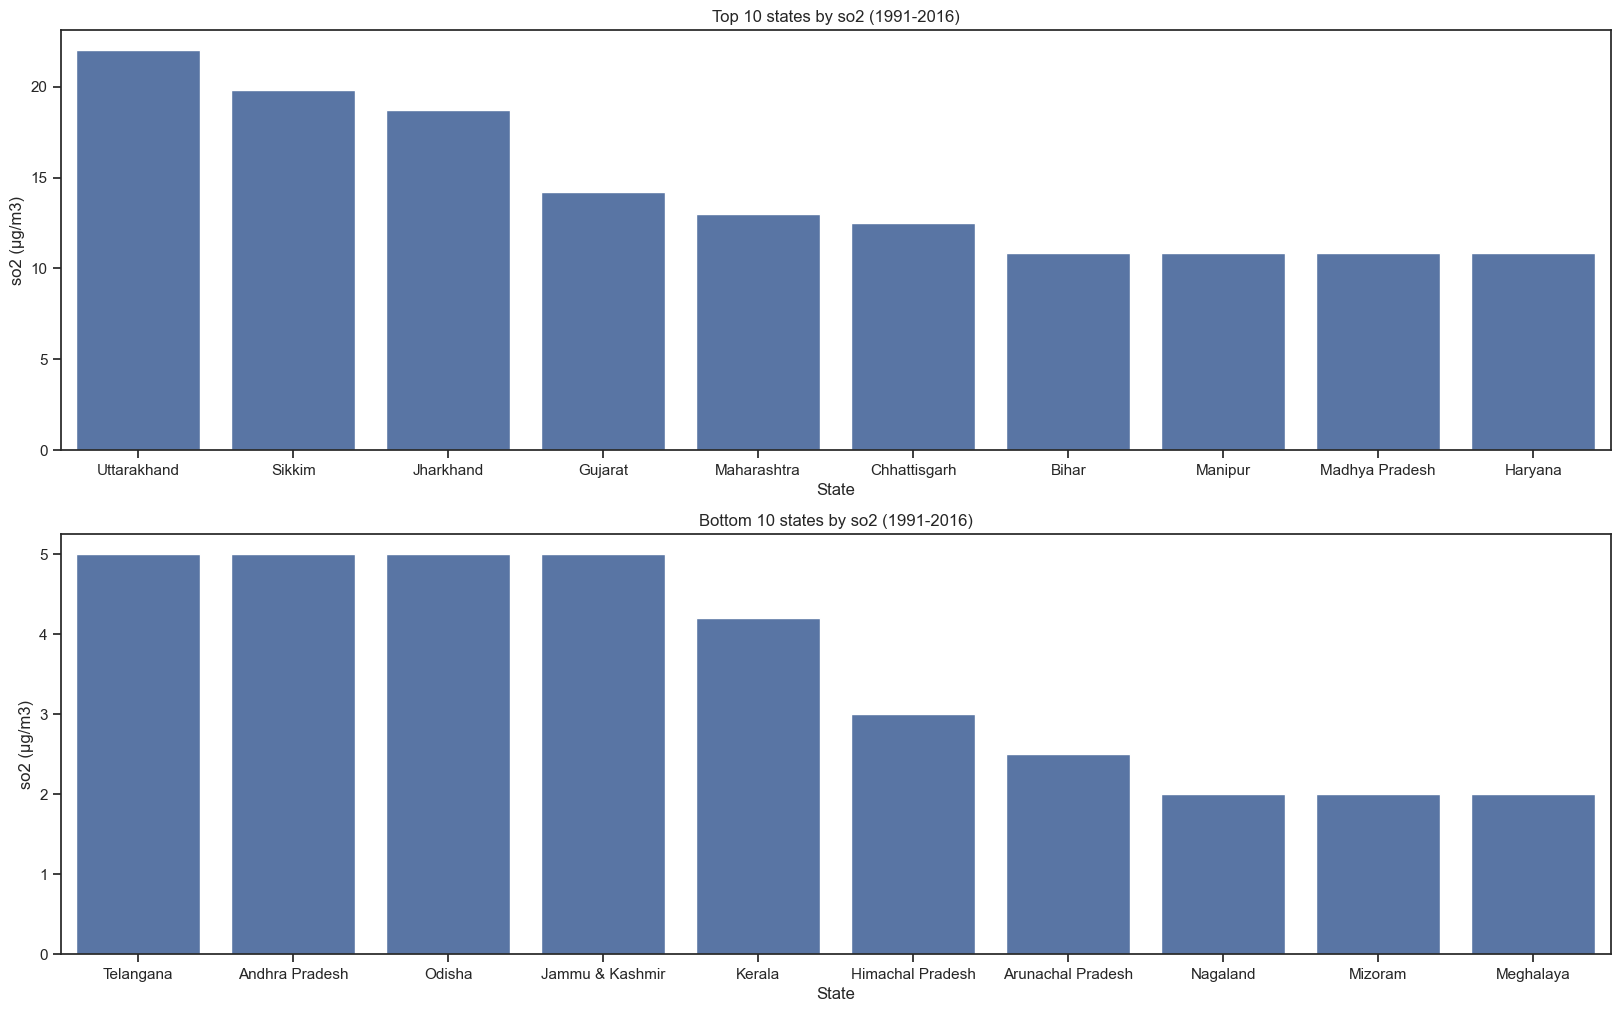

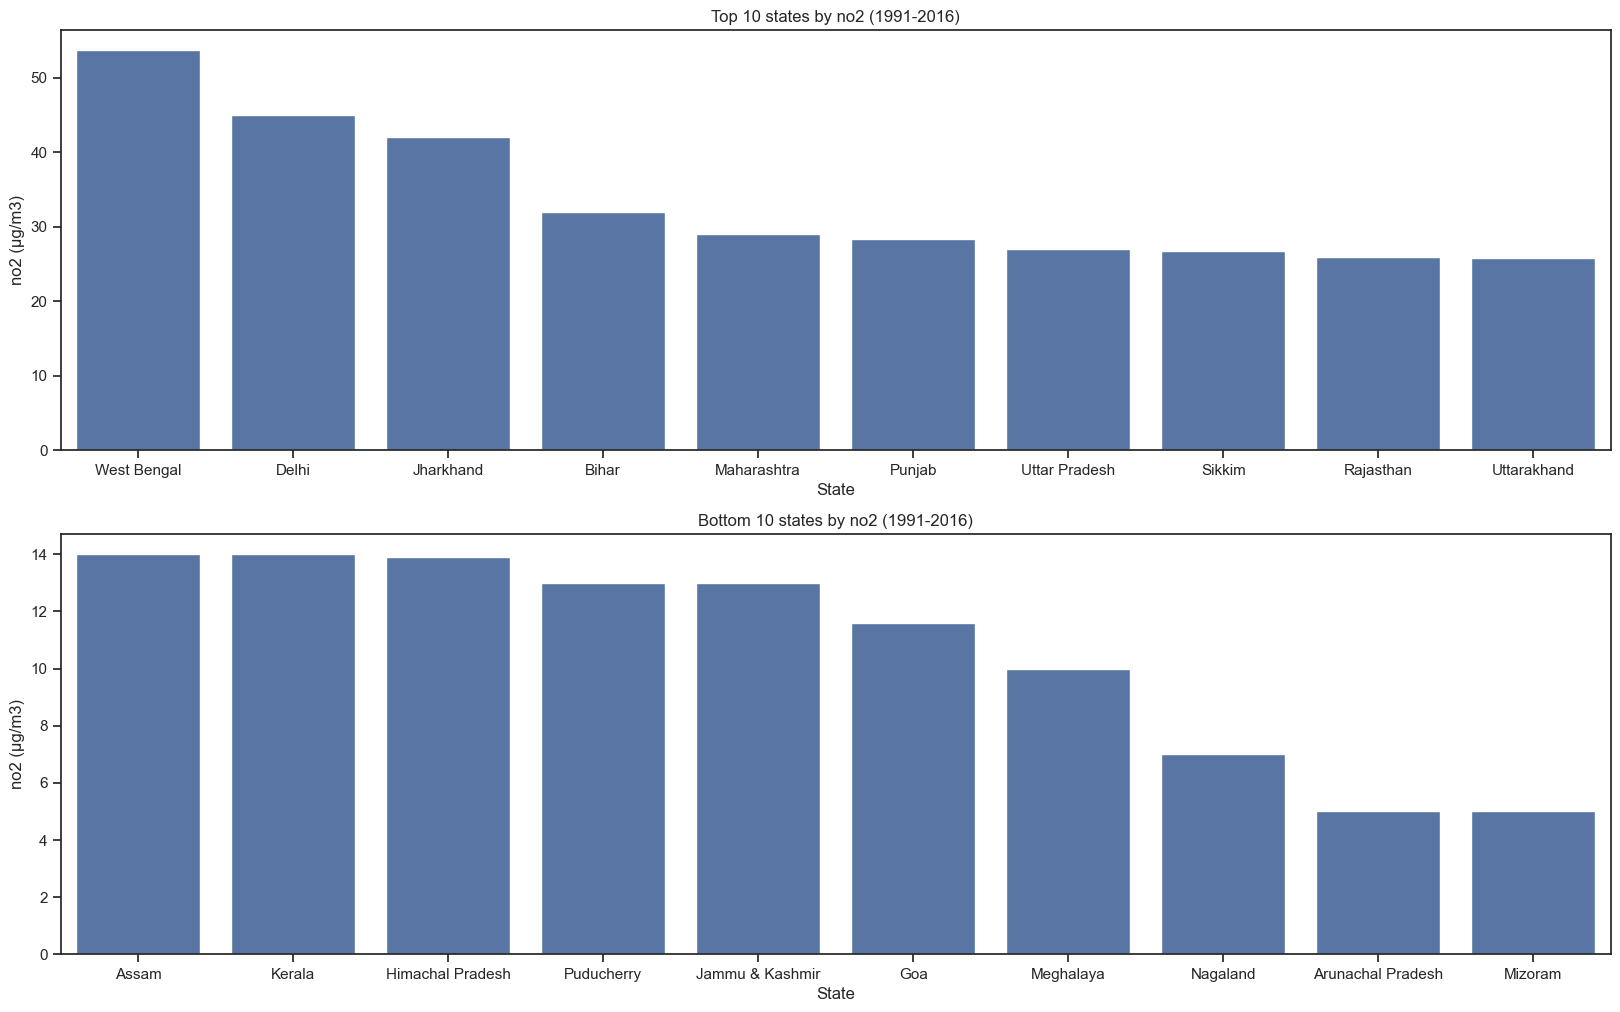

In [60]:
top_and_bottom_10_states("so2")
top_and_bottom_10_states("no2")

In [61]:
def highest_levels_recorded(indicator="so2"):
    plt.figure(figsize=(20, 10))
    
    # Group by 'state' and find the maximum levels for the specified indicator
    ind = df[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).max()
    
    # Plot the highest recorded levels
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title(f"Highest ever {indicator} levels recorded by state")
    highest.set_ylabel(f"{indicator} (µg/m3)")
    highest.set_xlabel("State")

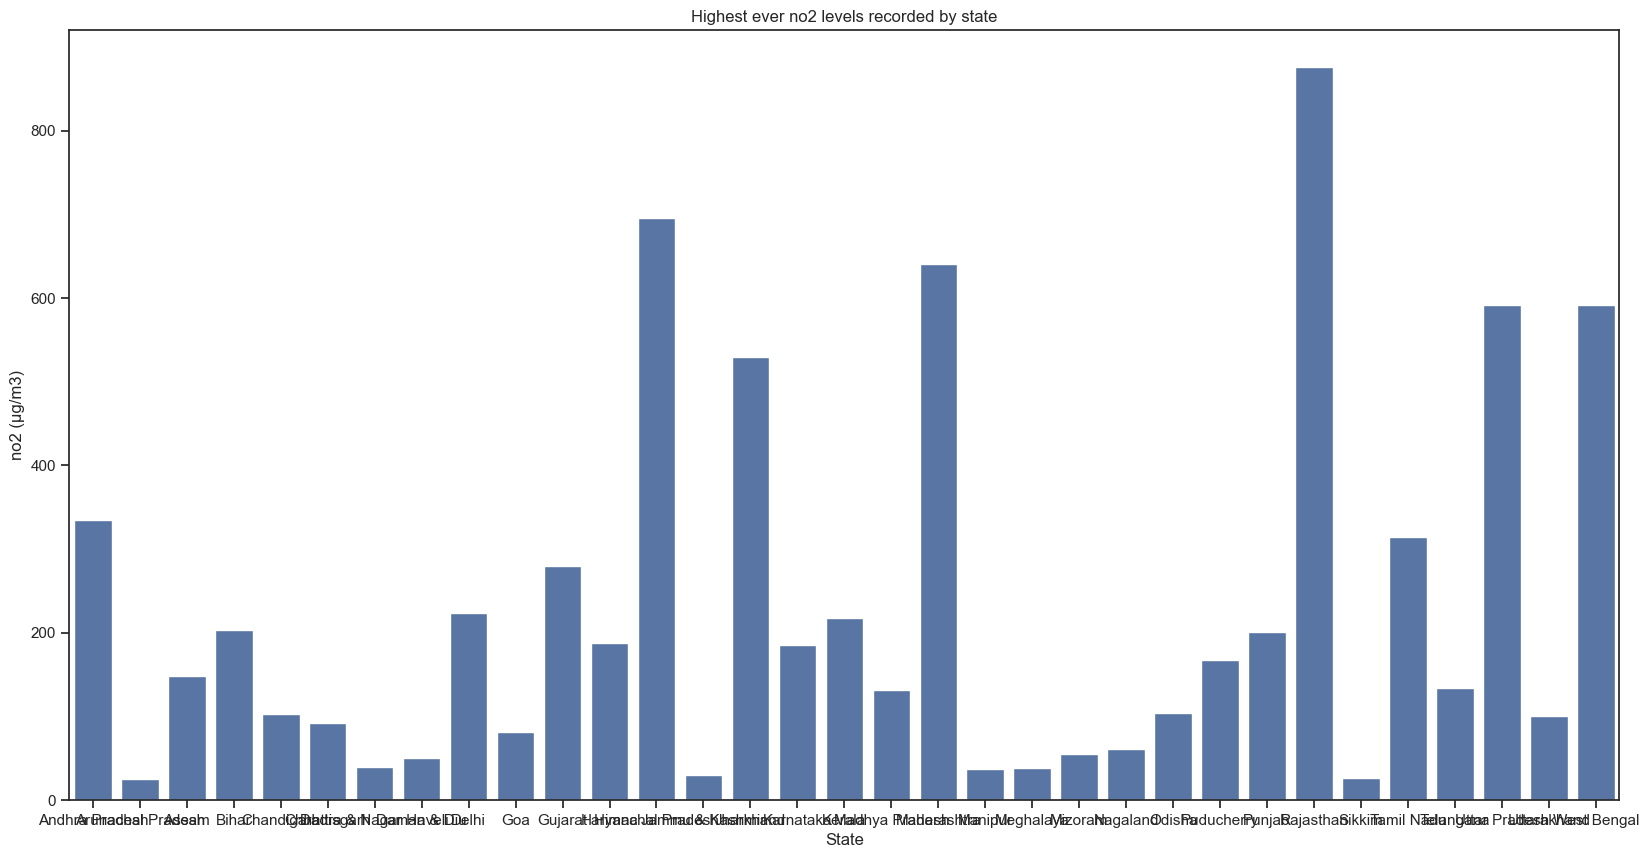

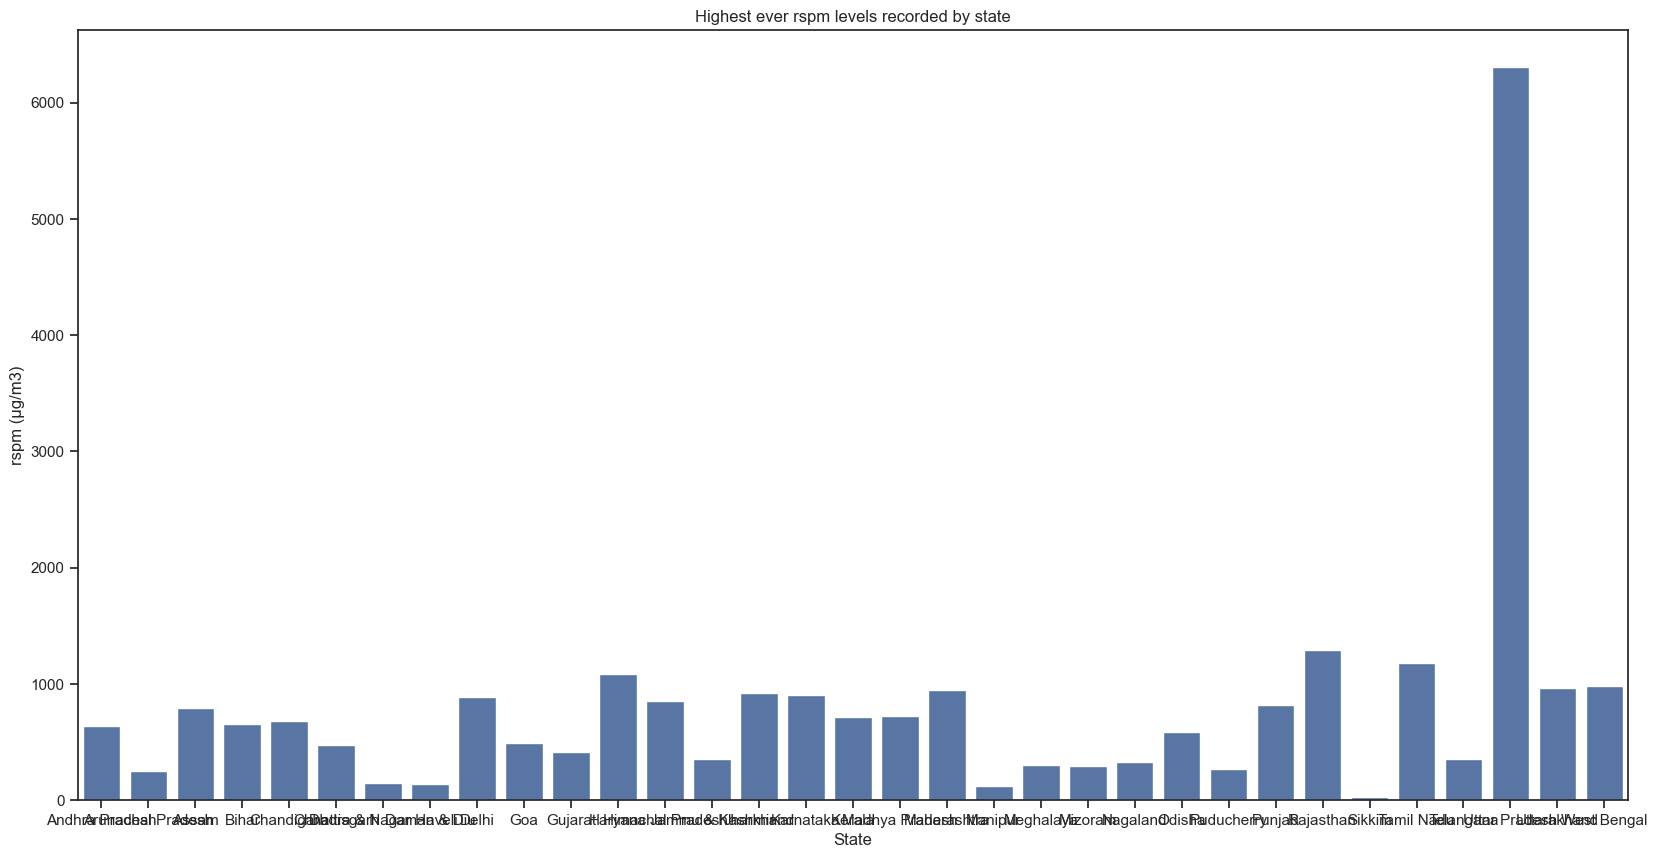

In [62]:
 highest_levels_recorded("no2")
 highest_levels_recorded("rspm")

In [63]:
def yearly_trend(state="", indicator="so2"):
    plt.figure(figsize=(20, 12))
    
    # Ensure 'year' column is extracted from 'date'
    df['year'] = df['date'].dt.year
    
    if state == "":
        # Group by year to get the yearly trend across all states
        year_wise = df[[indicator, 'year']].groupby('year', as_index=False).mean()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title(f'Yearly trend of {indicator}')
    else:
        # Filter for the specific state and group by year
        year_wise = df[df['state'] == state][[indicator, 'year']].groupby('year', as_index=False).mean()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title(f'Yearly trend of {indicator} for {state}')

In [64]:
yearly_trend()
yearly_trend("West Bengal", "no2")

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 2000x1200 with 0 Axes>

In [65]:
df['date'] = pd.to_datetime(df['date'])

In [66]:
def yearly_trend(state="", indicator="so2"):
    plt.figure(figsize=(20, 12))
    
    # Ensure 'year' column is extracted from 'date'
    df['year'] = df['date'].dt.year
    
    if state == "":
        # Group by year to get the yearly trend across all states
        year_wise = df[[indicator, 'year']].groupby('year', as_index=False).mean()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title(f'Yearly trend of {indicator}')
    else:
        # Filter for the specific state and group by year
        year_wise = df[df['state'] == state][[indicator, 'year']].groupby('year', as_index=False).mean()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title(f'Yearly trend of {indicator} for {state}')

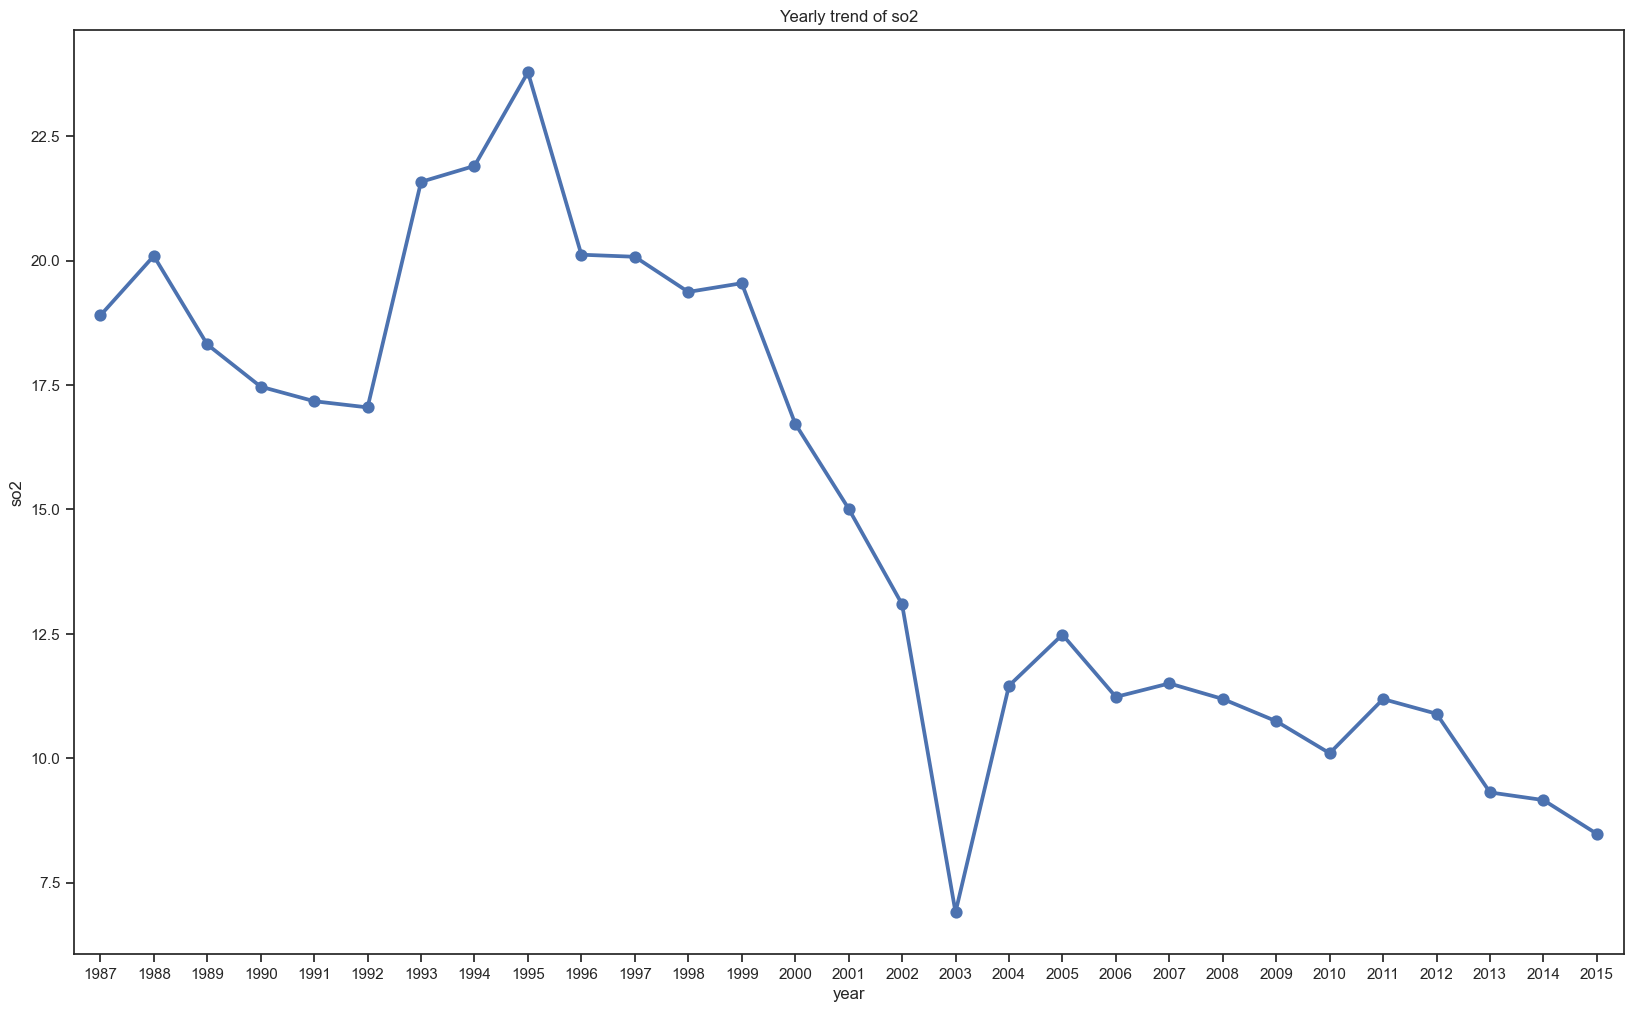

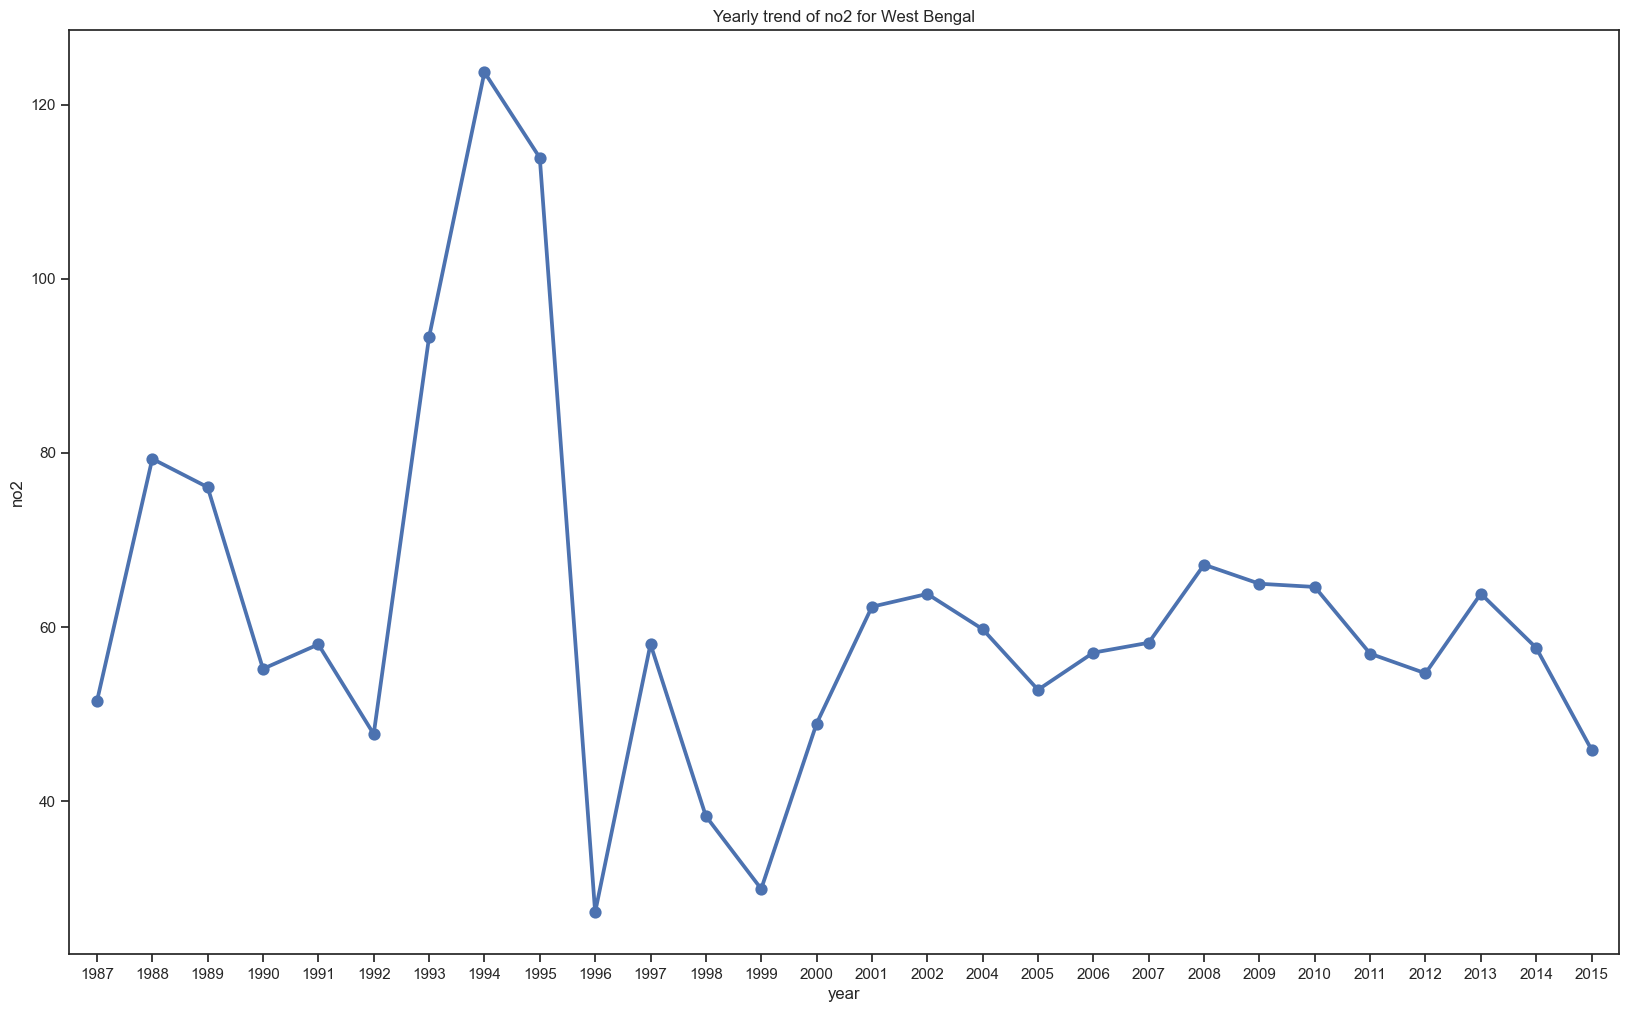

In [67]:
yearly_trend()
yearly_trend("West Bengal", "no2")

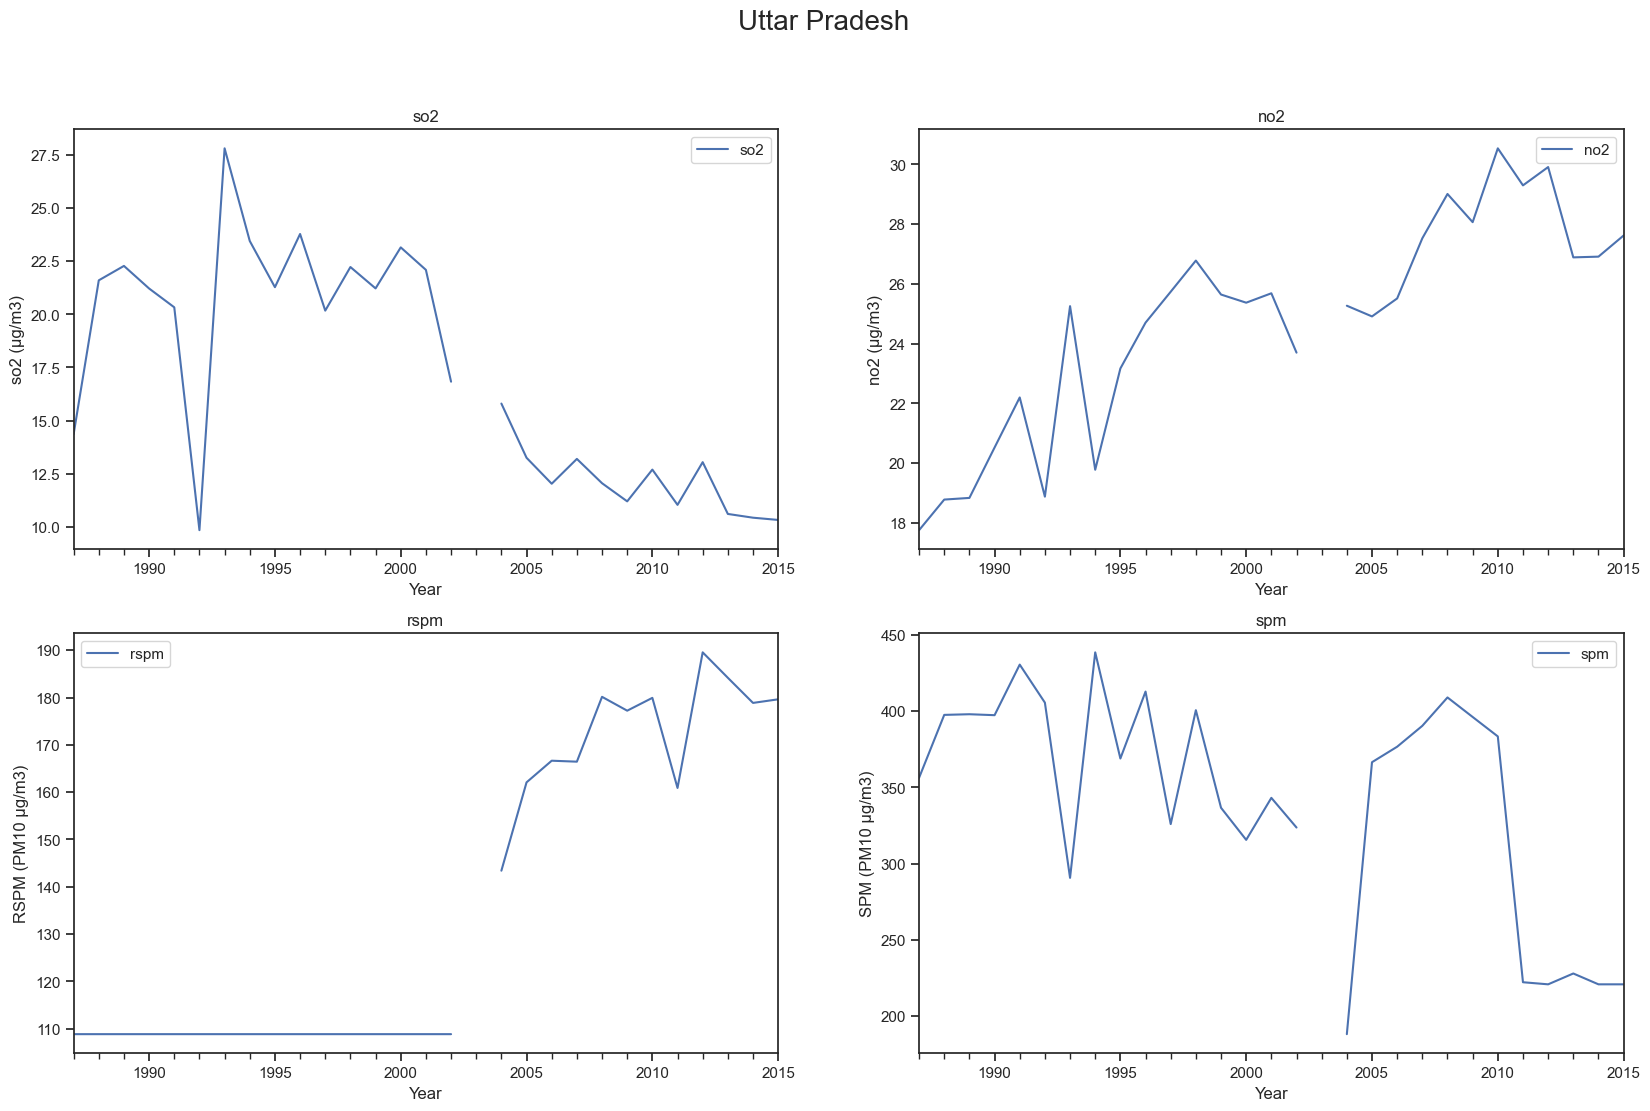

In [68]:
plot_for_state("Uttar Pradesh")

In [96]:
# defining a function to plot a heatmap for yearly median average for a give
def indicator_by_state_and_year(indicator="so2", df=None):
    if df is None:
        raise ValueError("DataFrame `df` is required.")
    
    # Create a pivot table for the given indicator
    pivot_data = df.pivot_table(values=indicator, index='state', columns='year', aggfunc='median')
    
    # Plot the heatmap
    plt.figure(figsize=(20, 20))
    hmap = sns.heatmap(
        data=pivot_data, 
        annot=True, 
        linewidths=.5,  # This belongs in sns.heatmap()
        cbar=True, 
        square=True, 
        cmap='inferno'  # Correct colormap name
    )
    hmap.set_title("{} by state and year".format(indicator))



In [98]:
indicator_by_state_and_year('no2')

ValueError: DataFrame `df` is required.

In [87]:
# defining a function to plot pollutant averages by type for a given indicat
def type_avg(indicator=""):
 type_avg = df[VALUE_COLS + ['type', 'date']].groupby("type").mean()
 if indicator is not "":
    t = type_avg[indicator].plot(kind='bar')
    plt.xticks(rotation = 0)
    plt.title("Pollutant average by type for {}".format(indicator))
 else:
    t = type_avg.plot(kind='bar')
    plt.xticks(rotation = 0)
    plt.title("Pollutant average by type")

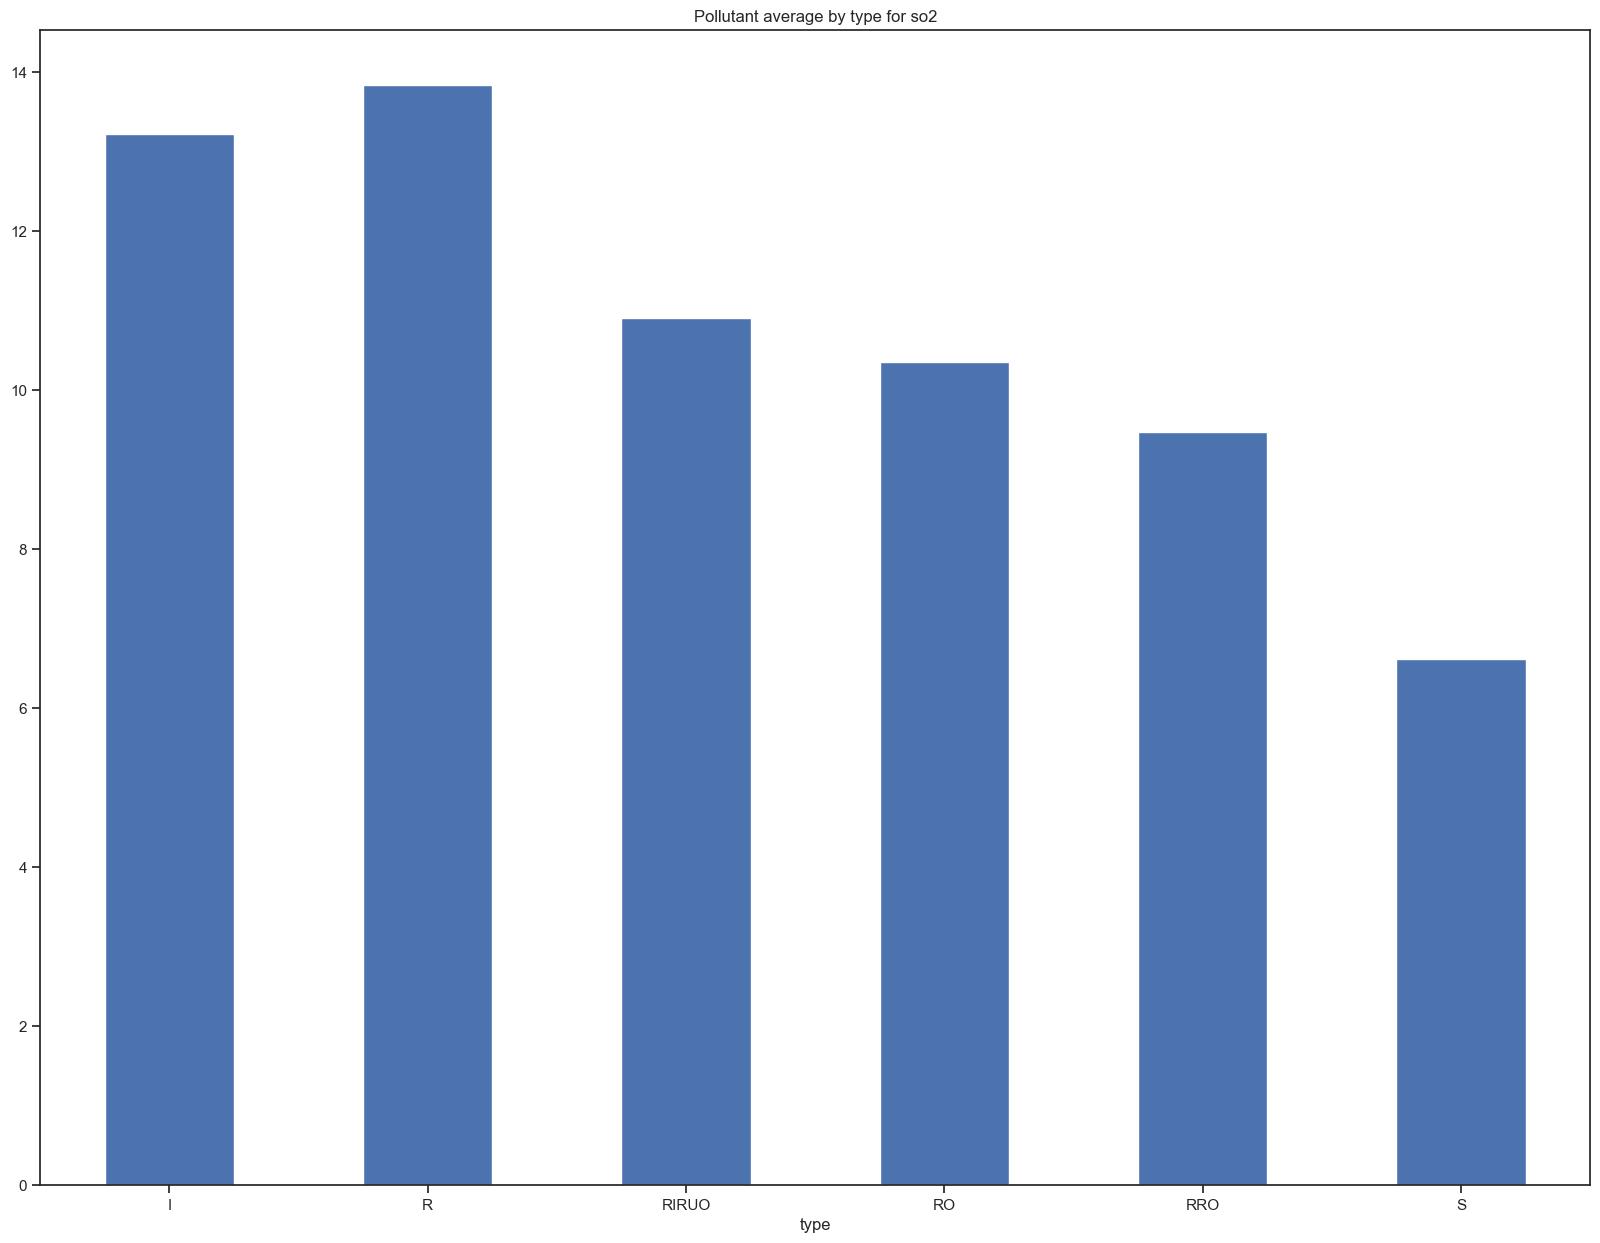

In [88]:
type_avg('so2')

In [93]:
# defining a function to plot pollutant averages for a given indicator (defa
def location_avgs(state, indicator="so2"):
    # Filter data for the specific indicator and necessary columns
    locs = df[VALUE_COLS + ['state', 'location', 'date']]
    
    # Group by 'state' and 'location' to calculate the average of the indicator for each location
    locs_grouped = locs.groupby(['state', 'location'])[indicator].mean().reset_index()
    
    # Filter data for the specified state
    state_avgs = locs_grouped[locs_grouped['state'] == state]

    # Plotting the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='location', y=indicator, data=state_avgs)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    plt.xticks(rotation=90) 

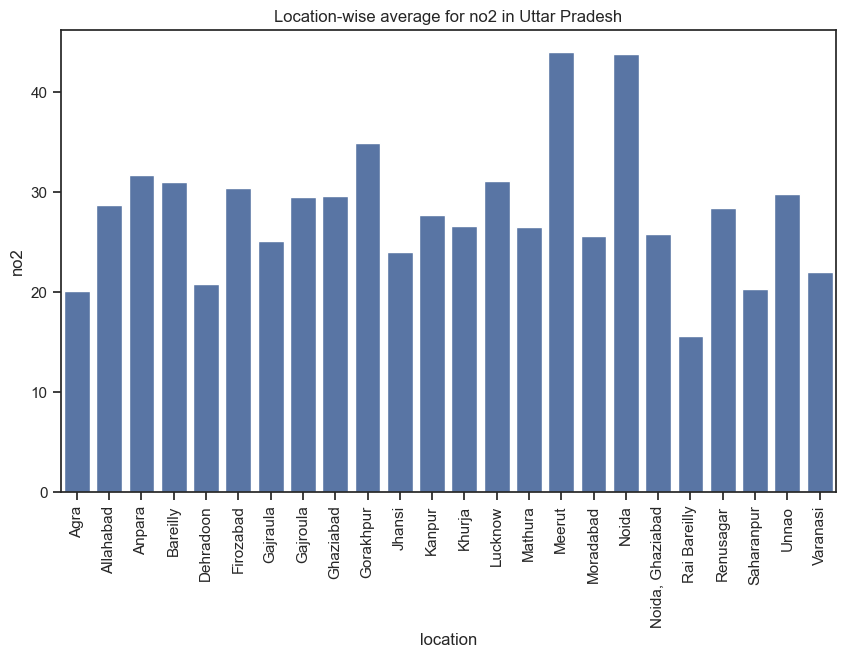

In [94]:
location_avgs("Uttar Pradesh", "no2")